## Image Classification (Dogs vs Cats) using Keras and CNN

#### Imports

In [110]:
import numpy as np
import tensorflow as tf
import os

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from scipy.misc import imresize, imsave

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

import matplotlib.pyplot as plt
%matplotlib inline

#### Define Image properties and directories

In [61]:
# Image height and width
img_height = 150
img_width = 150
num_classes = 2

# Train data and Validation Data 

train_dir = 'train'
validation_dir = 'validation'


#### Image Vectorization

In [62]:
#We'll scale the inputs to be in the range [0-1] rather than [0-255]
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 32

# automagically retrieve images and their classes for train and validation sets

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary')

Found 4974 images belonging to 2 classes.
Found 3091 images belonging to 2 classes.


#### A simple 3 layer Conv model with sigmoid output activation layer. 

In [63]:
# Here we code the convolutional neural network and its layers

#  In keras, if it is the first layer, we need to use the input_shape
#  argument. We are following the Cifar-10 example given in the Keras Documentation 
#  https://keras.io/layers/convolutional/
# Input shape : [Image_Width, Image_Height, 3] --> 3 is the depth R G B

# Layer 1
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # We are using a dropout treshold of 0.25

# Layer 2        
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
# Layer 3
          
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid')) # We can use softmax for more than two classes

#### Configuring the Model

In [64]:
# Before training a model, 
# you need to configure the learning process, which is done via the compile method. 

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training the Model

In [58]:
epochs = 20
train_samples = 4974
validation_samples = 3091

model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)

Epoch 1/20
155/155 [==============================] - 303s - loss: 0.7010 - acc: 0.5659 - val_loss: 0.6065 - val_acc: 0.6836
Epoch 2/20
155/155 [==============================] - 324s - loss: 0.6292 - acc: 0.6379 - val_loss: 0.5448 - val_acc: 0.6943
Epoch 3/20
155/155 [==============================] - 3729s - loss: 0.5757 - acc: 0.7033 - val_loss: 0.5407 - val_acc: 0.6787
Epoch 4/20
155/155 [==============================] - 333s - loss: 0.5160 - acc: 0.7420 - val_loss: 0.6168 - val_acc: 0.6692
Epoch 5/20
155/155 [==============================] - 311s - loss: 0.4822 - acc: 0.7745 - val_loss: 0.4389 - val_acc: 0.7927
Epoch 6/20
155/155 [==============================] - 340s - loss: 0.4327 - acc: 0.8014 - val_loss: 0.4797 - val_acc: 0.7757
Epoch 7/20
155/155 [==============================] - 390s - loss: 0.4082 - acc: 0.8127 - val_loss: 0.4761 - val_acc: 0.7849
Epoch 8/20
155/155 [==============================] - 319s - loss: 0.3599 - acc: 0.8422 - val_loss: 0.4485 - val_acc: 0.8084

#### Evaluation using Validation : 

We get the loss and accuracy for this model

In [65]:
model.evaluate_generator(validation_generator, validation_samples)

[0.68252437817610989, 0.64595113137899363]

As we can see, our accuracy is quite low. This can be resolved by using image augmentation like horizontal and vertical flips, thereby increasing the number of training samples. Moreover, we trained this on a 6 year old Mac-book with less than a third of the data. 

#### Test the model

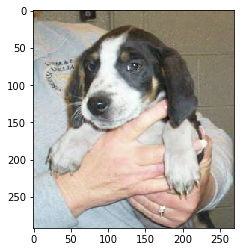

In [107]:
### Test on single image
test_dir = 'test'

path = "test/dogs/dog.10.jpg"

img = load_img(path)
plt.imshow(img)

In [108]:
img = imresize(img, (img_width, img_height))
img = img_to_array(img)

img.shape


(150, 150, 3)

In [109]:
img = img.reshape(1, 150, 150, 3)
classes = ["cat", "dog"]

print("This is a {0}.".format(classes[model.predict_classes(img)[0][0]]))

1/1 [==============================] - 0s
This is a dog.


#### Implement this using Resnet10, a pre-trained model using ImageNet

Keras comes with pre-trained models like Resnet10 and VGG16, which have been trained on the ImageNet data containing more than 1000 classes of images

In [114]:
model = ResNet50(weights='imagenet')

img_path = "test/dogs/dog.10.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0][0])

('Predicted:', (u'n02089867', u'Walker_hound', 0.44800162))
